El csv es sobre los musicos más vendidos. Muestra de que pais son, su periodo de actividad, el año de su primer disco, el TCU y las ventas.

In [1]:
import pandas as pd   #importamos la libreria pandas para poder leer el csv
import numpy as np

import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

def eliminarEspacios(valor):
  valor =str(valor)
  aux2 = ""
  for i in range(len(valor.split("/"))):
    aux = valor.split("/")[i]
    if aux[0] == " ":
      aux = aux[1:]
    if aux[len(aux)-1] == " ":
      aux = aux[:len(aux)-1]
    if i != 0:
      aux2 =aux2 + "/" + aux
    else:
      aux2 = aux

  return aux2


def cambiarPaises(valor):
    valor = str(valor)
    if "Canada" in valor: # cambia el campo que tiene canada y USA para que quede solo el primero (Canada)
      valor = "Canada"
    else:
      if "StatesUnited" in valor:# deja el primer valor que aparezca
        valor = "United States"
      if "United States" in valor and "United Kingdom" in valor:
        valor = valor.split(" ")[0] + valor.split(" ")[1]

    if valor == "United States":
      valor = "USA"
    if valor == "United Kingdom" or valor =="UnitedKingdom":
      valor = "UK"

    return valor


def cambiarMillones(valor):
    valor = str(valor)
    valor = valor.replace("million","M")
    valor = valor.replace("mill","M")
    valor = valor.replace("Mion","M")
    return valor


def unDecimal(valor):
    valor = str(valor)
    num = round(float(valor.split(' ')[0]),1)
    valor = str(num) + " " + valor.split(' ')[1]
    return valor


def sinDecimales(valor):
  return int(valor)



def minusculasYRock(valor):
    valor = str(valor)
    if "and roll" in valor:
      valor = valor.replace("Rock and roll", "rock")
      valor = valor.replace("rock and roll", "rock")
    return valor.lower()



def arreglar_columnas(columnas):
  for i in range(len(columnas)):
      columnas[i] = columnas[i].replace(" ","")
  return columnas



csv = pd.read_csv("./sample_data/best_selling_artists.csv")
csvColumnas = list(csv.columns)
csv.dropna(inplace=True) # elimina las filas que contengan valores vacios


#csv.columns = arreglar_columnas(csvColumnas) # se le aplica la funcion a la lista de columnas
#csv = csv.applymap(resolver_espacios)


csv["Country"] = csv["Country"].apply(cambiarPaises) # reemplaza united states por USA y united kingdom por UK

csv["Sales"] = csv["Sales"].apply(cambiarMillones) # reemplada "millions" por M

csv["TCU"] = csv["TCU"].apply(cambiarMillones)
csv["TCU"] = csv["TCU"].apply(unDecimal)

csv["Genre"] = csv["Genre"].apply(minusculasYRock) # escribe todos los valores en minusculas y reemplaza "rock and roll" por rock
csv["Genre"] = csv["Genre"].apply(eliminarEspacios) #
csv["Year"] = csv["Year"].apply(sinDecimales) #saca decimales a los años

csv.to_csv('./nuevo.csv')
#print(csv)




grafico de barras

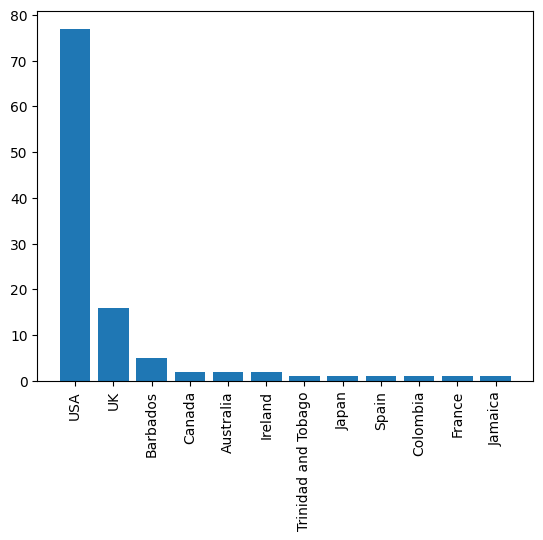

In [ ]:
import pandas as pd   #importamos la libreria pandas para poder leer el csv
import numpy as np

import matplotlib.pyplot as plt1

fcsv = pd.read_csv("./nuevo.csv")
fcsv.columns = arreglar_columnas(list(fcsv.columns))

valoresX = fcsv['Country'].unique()
plt1.xticks(rotation=90)

#for i in range(len(valoresX)):
 # valoresX[i] = valoresX[i][:4]


valoresY = fcsv['Country'].value_counts().tolist()
plt1.bar(valoresX, valoresY)
plt1.show()


Este grafico muestra que la mayoria de los artistas más escuchados son de EE.UU y del Reino Unido-->

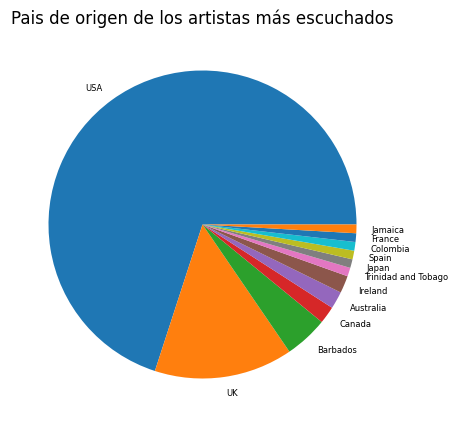

In [ ]:
import pandas as pd   #importamos la libreria pandas para poder leer el csv
import numpy as np

import matplotlib.pyplot as plt1


fcsv = pd.read_csv("./nuevo.csv")
fcsv.columns = arreglar_columnas(list(fcsv.columns))

valoresX = fcsv['Country'].unique()
valoresY = fcsv['Country'].value_counts().tolist()
#print(valoresY)


fig1, ax1 = plt1.subplots(figsize=(5, 5))
ax1.pie(valoresY, labels=valoresX, textprops={'fontsize': 6})
plt1.title('Pais de origen de los artistas más escuchados')
plt1.show()

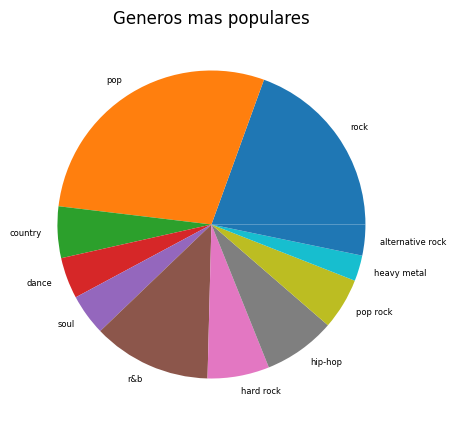

In [ ]:
import pandas as pd   #importamos la libreria pandas para poder leer el csv
import numpy as np

import matplotlib.pyplot as plt1

def generos():
  df = pd.read_csv("./nuevo.csv")
  test1  = df["Genre"]
  genres = []

  for i in range(len(test1)): #separa cada genero diferente dentro de cada artista
    gen = test1[i].split('/')
    for x in gen:
      genres.append(x)

  return genres

def cantidadArtistas(generos): #cuenta la cantidad de veces que aparece cada genero
  cont = {}
  for x in generos:
    if x not in cont.keys():
      cont[x] = 1
    else:
      cont[x] = cont[x]+1
  return cont


generos = generos() #separa cada genero sin repeticiones
cont = cantidadArtistas(generos)
#print(cont)

labels = []
for x in cont.keys():
  if cont[x]>=5: #incluye solo a los generos que tengan mas o 5 artistas
    labels.append(x)

cant = []
for x in labels:
  cant.append(cont[x])

fig1, ax1 = plt1.subplots(figsize=(5, 5))
ax1.pie(cant, labels=labels, textprops={'fontsize': 6})
plt1.title('Generos mas populares')
plt1.show()




<-- El grafico muestra que la mayoria de los artistas más escuchados son de Pop o Rock

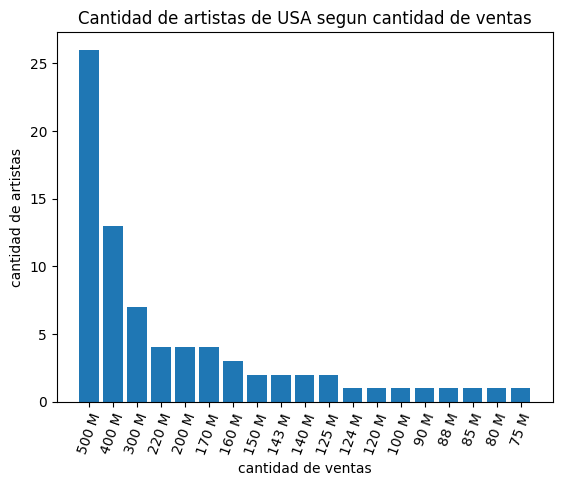

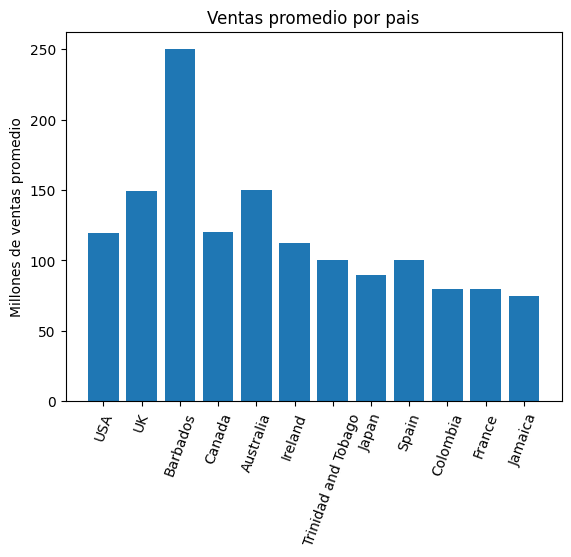

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

def promedioPais(x):
  df2 = fcsv[fcsv.Country == x]
  cantidad = 0
  cont = 0
  for z in df2["Sales"]:
    cantidad = cantidad + int(z.strip("M"))
    cont = cont +1
  promedio = cantidad/cont
  return promedio


#barras segun cantidad de ventas de artistas de EE.UU
fcsv = pd.read_csv("./nuevo.csv")
fcsv.columns = arreglar_columnas(list(fcsv.columns))

fcsv2 = fcsv[fcsv.Country == "USA"]
valoresX = fcsv2['Sales'].unique()
plt1.xticks(rotation=70)

valoresY = fcsv2['Sales'].value_counts().tolist()
plt1.bar(valoresX, valoresY)
plt1.xlabel("cantidad de ventas")
plt1.ylabel("cantidad de artistas")
plt1.title("Cantidad de artistas de USA segun cantidad de ventas")
plt1.show()



#promedio por pais
paises = fcsv['Country'].unique()
plt2.xticks(rotation=70)
promedios = []
for x in paises:
  promedios.append(promedioPais(x))


plt2.bar(paises, promedios)
plt2.ylabel("Millones de ventas promedio")
plt2.title("Ventas promedio por pais")
plt2.show()











<-- La mayoria de los artistas de EE.UU tienen 500M de ventas




Conclusion general:
La mayoria de los artista más escuchados son estadounidenses y del genero de Rock o Pop.
El promedio de ventas es mas bajo que otros paises por la cantidad de veces que aparece en la lista, pero tiene artistas que llegan a las 500M de ventas.